### In this notebook, we use Gudhi to compute persistence diagrams on the animal or mpeg7 dataset

In [1]:
import numpy              as np
import math       
import sys
import matplotlib.pyplot  as plt
import matplotlib.image   as mpimg
import gudhi              as gd

All tif files of animal dataset are available at https://sites.google.com/site/xiangbai/animaldataset

All gif files of mpeg7 dataset are available at http://www.dabi.temple.edu/~shape/MPEG7/dataset.html

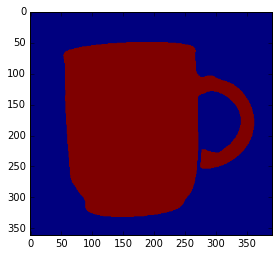

Computing barycenter... (184, 177)
Done.
Computing bounding radius... 183.3303030052588
Done.
Computing persistence diagram...Done.

[(0, (-0.8018314353398703, inf)), (0, (-0.3763698574044289, 0.3054595944151887))]


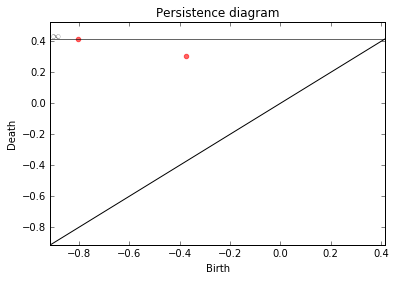

In [2]:
# labels of animal dataset:
# bird butterfly cat cow crocodile deer dog dolphine duck elephant fish
# flyingbird hen horse leopard monkey rabbit rat spider tortoise

# labels of mpeg7 dataset:
# apple bat beetle bell bird bone bottle brick butterfly camel 
# car carriage cattle cellphone chicken child chopper classic comma crown
# cup deer device0 device1 device2 device3 device4 device5 device6 device7
# device8 device9 dog elephant face fish flatfish fly fork fountain
# frog glas guitar hammer hat hcircle heart horse horseshoe jar
# key lizzard imfixh misk octopus pencil car pocket rat ray
# seasnake shoe spoon spring stef teddy tree truck turtle watch

# Select dataset
dataset    = 'mpeg7'

# Select label
animal     = 'cup'
# Select index of image (1--100 for animal, 1--20 for mpeg7)
img_idx    = 15
# Select a direction between 1 and 32
direction  = 8

# Read and show image
img = []
if (dataset == 'animal'):
    img = mpimg.imread('animal/%s/%s%d.tif' % (animal,animal,img_idx))
if(dataset == 'mpeg7'):
    img = mpimg.imread('mpeg7/%s-%d.gif' % (animal,img_idx))
    
plt.imshow(img)
plt.show()

if(len(img.shape) > 2):
    bin_img = img[:,:,0]/255
else:
    bin_img = img/255
    
# Compute barycenter of shape
sys.stdout.write('Computing barycenter... ')
barycenter = np.array([0,0])
shape_size = 0
for i in range(bin_img.shape[0]):
    for j in range(bin_img.shape[1]):
        if(bin_img[i][j] == 1):
            barycenter[0] += i
            barycenter[1] += j
            shape_size    += 1
barycenter /= shape_size
print(np.round(barycenter[0]),np.round(barycenter[1]))
sys.stdout.write("Done.\n")

# Compute bounding radius of shape
sys.stdout.write('Computing bounding radius... ')
bounding_radius = 0
for i in range(bin_img.shape[0]):
    for j in range(bin_img.shape[1]):
        if(bin_img[i][j] == 1):
            bounding_radius = max(bounding_radius, np.linalg.norm(np.array([i,j])-barycenter))
print(bounding_radius)
sys.stdout.write("Done.\n")
    
sys.stdout.write('Computing persistence diagram...')
# Compute unit vector corresponding to selected direction
theta = direction*2.0*math.pi/32
unit_vector = np.array([-math.sin(theta), math.cos(theta)])
    
# Use normalized scalar product with unit vector as filtration value
filt = []
max_func = 0
for j in range(bin_img.shape[1]):
    for k in range(bin_img.shape[0]):
        if(bin_img[k][j] == 1):
            func = np.dot(np.array([k,j])-barycenter,unit_vector)/bounding_radius
            filt.append(func)
            max_func = max(max_func,func)
        else:
            filt.append(bounding_radius+1)

# Compute persistence diagram with Gudhi using image as a cubical complex
dim  = np.array([bin_img.shape[0], bin_img.shape[1]])
cc   = gd.CubicalComplex(dimensions = dim, top_dimensional_cells = np.array(filt))
diag = cc.persistence(homology_coeff_field=2, min_persistence=0)
sys.stdout.write("Done.\n\n")

# Visualize persistence diagram
print(diag)
plot  = gd.plot_persistence_diagram(diag)
plot.show()